In [1]:
import altair as alt
import datetime
import pandas as pd

In [2]:
def float_to_datestring(time):
    """Convert a floating point date from TreeTime `numeric_date` to a date string
    """
    # Extract the year and remainder from the floating point date.
    year = int(time)
    remainder = time - year

    # Calculate the day of the year (out of 365 + 0.25 for leap years).
    tm_yday = int(remainder * 365.25)
    if tm_yday == 0:
        tm_yday = 1

    # Construct a date object from the year and day of the year.
    date = datetime.datetime.strptime("%s-%s" % (year, tm_yday), "%Y-%j")

    # Build the date string with zero-padded months and days.
    date_string = "%s-%.2i-%.2i" % (date.year, date.month, date.day)

    return date_string

In [3]:
df = pd.read_csv("../analyses/simulations/tmrca_per_pivot_exposure_penalty_1.0.tsv", sep="\t")

In [4]:
df["timepoint"] = pd.to_datetime(df["pivot"].apply(float_to_datestring))

In [5]:
df.head()

,pivot,tmrca,timepoint
0,2000.00,0.11,2000-01-01
1,2000.25,0.36,2000-03-31
2,2000.50,0.61,2000-06-30
3,2000.75,0.90,2000-09-29
4,2001.00,1.15,2001-01-01


In [14]:
rolling_df = df.set_index(["timepoint"]).rolling(4)["tmrca"].mean().dropna().reset_index()

In [15]:
rolling_df.head()

,timepoint,tmrca
0,2000-09-29,0.4950
1,2001-01-01,0.7550
2,2001-04-01,1.0175
3,2001-07-01,1.2800
4,2001-09-30,1.5325


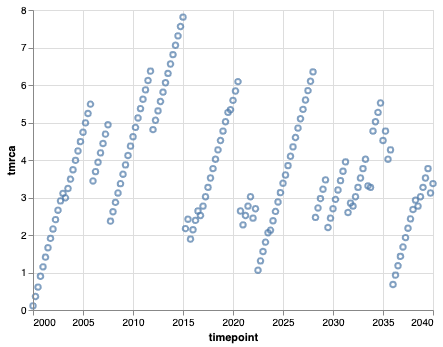

In [16]:
alt.Chart(df).mark_point().encode(
    x="timepoint:T",
    y="tmrca:Q"
)

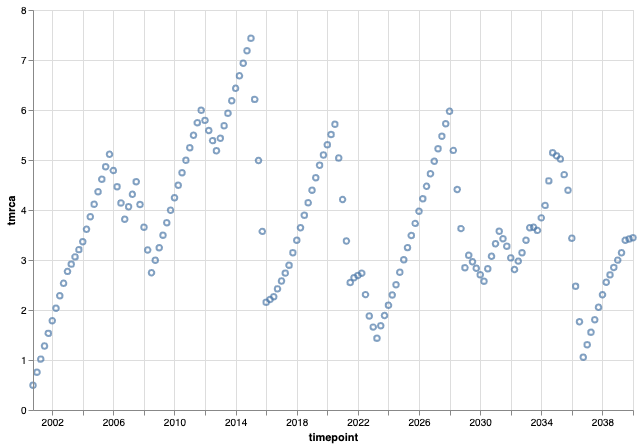

In [17]:
alt.Chart(rolling_df).mark_point().encode(
    x="timepoint:T",
    y="tmrca:Q"
).properties(
    height=400,
    width=600
)